# 3. Dashboard

### Understanding

Will be using the pickle files for dataframes

Using streamlit for dashboard

In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler



%matplotlib inline


In [2]:
# loading pickles

tiktok_df = pd.read_pickle('tiktok.pkl')
youtube_df = pd.read_pickle('youtube.pkl')

In [3]:
st.dataframe(tiktok_df)

2024-11-17 21:20:34.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 21:20:34.699 
  command:

    streamlit run /home/takosaga/miniconda3/envs/mongoDB_practice/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-11-17 21:20:34.701 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

streamlit does not run from notebook, so have to write a py file

In [4]:
%%writefile test.py

import streamlit as st
import pandas as pd

# Assuming your pickle files are in the same directory as the script
tiktok_df = pd.read_pickle('tiktok.pkl')
youtube_df = pd.read_pickle('youtube.pkl')

# Display the DataFrames
st.header("DataFrames from Pickle Files")
st.dataframe(tiktok_df.head())
st.dataframe(youtube_df.head())

Overwriting test.py


In [5]:
# running test.py
# !streamlit run test.py

In [6]:
tiktok_df.head()

,tiktok_duration_sec,tiktok_view_count,tiktok_like_count,tiktok_comment_count,tiktok_total_engagement
0,59,343296.0,19425.0,0.0,362721.0
1,32,140877.0,77355.0,684.0,218916.0
2,31,902185.0,97690.0,329.0,1000204.0
3,25,437506.0,239954.0,584.0,678044.0
4,19,56167.0,34987.0,152.0,91306.0


In [7]:
tiktok_df.describe()

,tiktok_duration_sec,tiktok_view_count,tiktok_like_count,tiktok_comment_count,tiktok_total_engagement
count,19084.000000,19084.000000,19084.000000,19084.000000,1.908400e+04
mean,32.423811,254708.558688,84304.636030,349.312146,3.393625e+05
std,16.226470,322893.280814,133420.546814,799.638865,4.379451e+05
min,5.000000,20.000000,0.000000,0.000000,2.300000e+01
25%,18.000000,4942.500000,810.750000,1.000000,6.013750e+03
50%,32.000000,9954.500000,3403.500000,9.000000,1.376100e+04
75%,47.000000,504327.000000,125020.000000,292.000000,6.608205e+05
max,60.000000,999817.000000,657830.000000,9599.000000,1.656099e+06


In [8]:
youtube_df.head()

,youtube_view_count,youtube_like_count,youtube_comment_count,youtube_duration_sec,youtube_total_engagement
0,77057,909,557,471.0,78523
1,188949,3734,1930,566.0,194613
2,1922598,20215,3737,333.0,1946550
3,6013,94,77,306.0,6184
4,190901,2969,762,144.0,194632


In [9]:
youtube_df.describe()

,youtube_view_count,youtube_like_count,youtube_comment_count,youtube_duration_sec,youtube_total_engagement
count,4.438000e+03,4.438000e+03,4438.000000,4438.000000,4.438000e+03
mean,1.671639e+07,1.808250e+05,4222.283912,1069.409419,1.690143e+07
std,1.412573e+08,8.630587e+05,22055.256455,3498.798586,1.418146e+08
min,1.000000e+00,0.000000e+00,0.000000,6.000000,1.000000e+00
25%,6.624025e+04,1.064000e+03,87.000000,92.000000,6.923475e+04
50%,4.143255e+05,6.989500e+03,508.500000,301.500000,4.249510e+05
75%,2.723768e+06,4.923275e+04,2278.250000,865.000000,2.793591e+06
max,6.104343e+09,1.562634e+07,532252.000000,69826.000000,6.104343e+09


(array([3836., 3727., 3681., 3750., 4090.]),
 array([ 5., 16., 27., 38., 49., 60.]),
 <BarContainer object of 5 artists>)

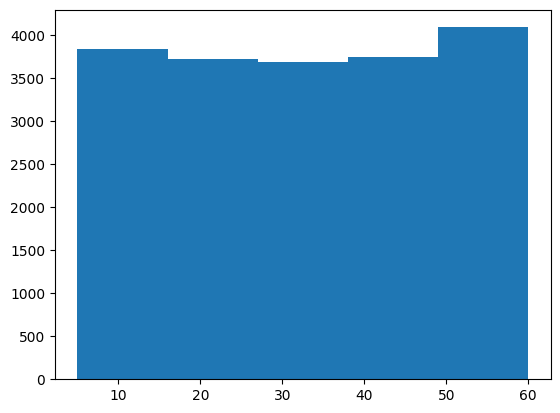

In [10]:
data_to_plot = tiktok_df['tiktok_duration_sec']

plt.hist(data_to_plot, bins=5)


<Axes: xlabel='tiktok_duration_sec', ylabel='Count'>

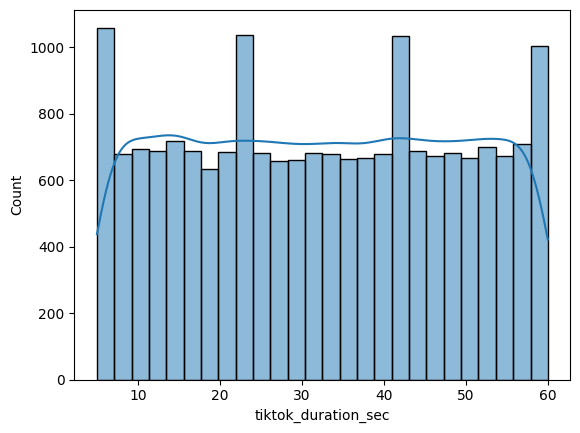

In [11]:
sns.histplot(data_to_plot, kde=True)


(array([4.043e+03, 2.220e+02, 8.600e+01, 3.100e+01, 1.700e+01, 7.000e+00,
        6.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        1.900e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([6.00000000e+00, 2.33333333e+03, 4.66066667e+03, 6.98800000e+03,
        9.31533333e+03, 1.16426667e+04, 1.39700000e+04, 1.62973333e+04,
        1.86246667e+04, 2.09520000e+04, 2.32793333e+04, 2.56066667e+04,
        2.79340000e+04, 3.02613333e+04, 3.25886667e+04, 3.49160000e+04,
        3.72433333e+04, 3.95706667e+04, 4.18980000e+04, 4.42253333e+04,
        4.65526667e+04, 4.88800000e+04, 5.12073333e+04, 5.35346667e+04,
        5.58620000e+04, 5.81893333e+04, 6.05166667e+04, 6.28440000e+04,
        6.51713333e+04, 6.74986667e+04, 6.98260000e+04]),
 <BarContainer object of 30 artists>)

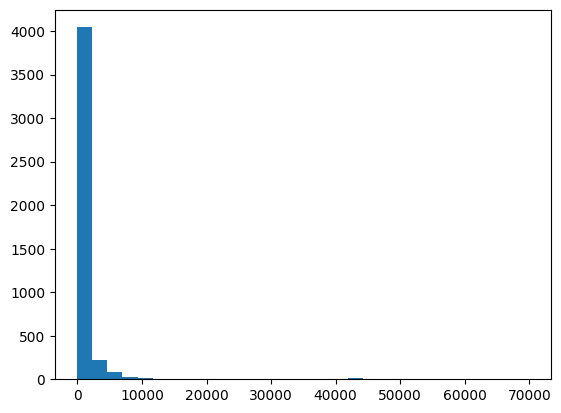

In [12]:
data_to_plot = youtube_df['youtube_duration_sec']

plt.hist(data_to_plot, bins=30)

<Axes: xlabel='youtube_duration_sec', ylabel='Count'>

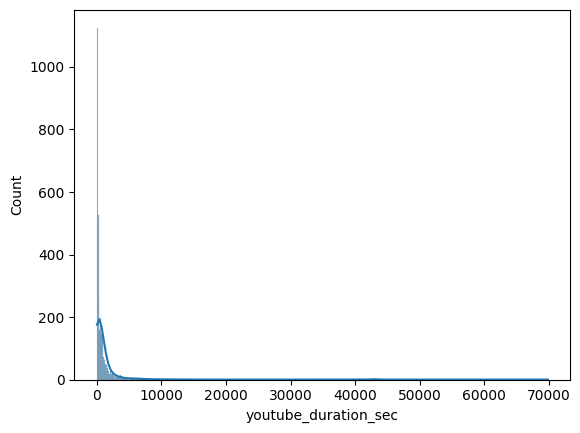

In [13]:
sns.histplot(data_to_plot, kde=True)


Lets reduce duration to 10 mins 360 secs

In [14]:
youtube_filtered_df = youtube_df[youtube_df['youtube_duration_sec'] < 600]

(array([327., 320., 381.,  59.,  54.,  77.,  96., 108., 132., 168., 143.,
        119.,  83.,  82.,  70.,  64.,  53.,  41.,  47.,  31.,  44.,  23.,
         34.,  31.,  59.,  29.,  38.,  43.,  40.,  47.]),
 array([  6.        ,  25.73333333,  45.46666667,  65.2       ,
         84.93333333, 104.66666667, 124.4       , 144.13333333,
        163.86666667, 183.6       , 203.33333333, 223.06666667,
        242.8       , 262.53333333, 282.26666667, 302.        ,
        321.73333333, 341.46666667, 361.2       , 380.93333333,
        400.66666667, 420.4       , 440.13333333, 459.86666667,
        479.6       , 499.33333333, 519.06666667, 538.8       ,
        558.53333333, 578.26666667, 598.        ]),
 <BarContainer object of 30 artists>)

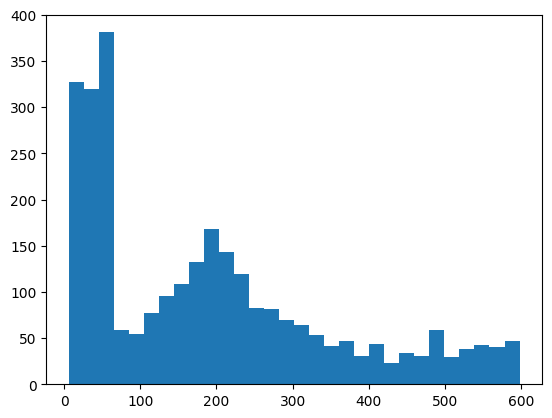

In [15]:
data_to_plot = youtube_filtered_df['youtube_duration_sec']

plt.hist(data_to_plot, bins=30)

In [16]:
youtube_filtered_df.describe()

,youtube_view_count,youtube_like_count,youtube_comment_count,youtube_duration_sec,youtube_total_engagement
count,2.843000e+03,2.843000e+03,2843.000000,2843.000000,2.843000e+03
mean,2.478149e+07,2.679399e+05,5247.996834,190.043264,2.505467e+07
std,1.756174e+08,1.066646e+06,26875.036233,161.281104,1.763032e+08
min,1.000000e+00,0.000000e+00,0.000000,6.000000,1.000000e+00
25%,7.813250e+04,1.063000e+03,87.000000,51.000000,8.035200e+04
50%,6.462460e+05,1.109600e+04,575.000000,163.000000,6.698080e+05
75%,5.372012e+06,1.051625e+05,2550.500000,278.500000,5.584422e+06
max,6.104343e+09,1.562634e+07,532252.000000,598.000000,6.104343e+09


<Axes: xlabel='youtube_duration_sec', ylabel='Count'>

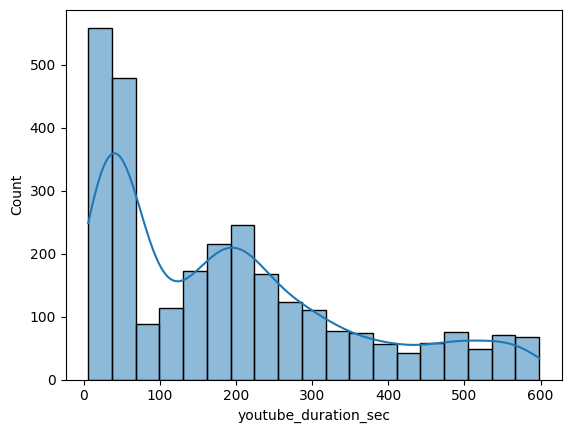

In [17]:
sns.histplot(data_to_plot, kde=True)


Since metrics are in different scales so values will be normalized, will not make duration normalized

In [18]:
# only features to normalize
tiktok_df_secs = tiktok_df["tiktok_duration_sec"]
tiktok_df = tiktok_df.drop('tiktok_duration_sec', axis=1)


In [19]:
# df with normlized values
scaler = MinMaxScaler()
tiktok_norm_df = scaler.fit_transform(tiktok_df)



In [20]:
# inserting secs into df 
tiktok_norm_df = pd.DataFrame(tiktok_norm_df, columns=tiktok_df.columns)
tiktok_norm_df['tiktok_duration_sec'] = tiktok_df_secs


In [21]:
tiktok_norm_df.head()

,tiktok_view_count,tiktok_like_count,tiktok_comment_count,tiktok_total_engagement,tiktok_duration_sec
0,0.343346,0.029529,0.000000,0.219010,59
1,0.140886,0.117591,0.071257,0.132176,32
2,0.902348,0.148503,0.034274,0.603946,31
3,0.437575,0.364766,0.060840,0.409414,25
4,0.056158,0.053185,0.015835,0.055120,19


In [22]:
# only features to normalize
youtube_df_secs = youtube_filtered_df["youtube_duration_sec"]
youtube_filtered_df = youtube_filtered_df.drop('youtube_duration_sec', axis=1)

In [23]:
# df with normalized values
youtube_norm_df = scaler.fit_transform(youtube_filtered_df)

In [24]:
# insert
youtube_norm_df = pd.DataFrame(youtube_norm_df, columns=youtube_filtered_df.columns)
youtube_norm_df['youtube_duration_sec'] = youtube_df_secs

In [25]:
youtube_norm_df.head()

,youtube_view_count,youtube_like_count,youtube_comment_count,youtube_total_engagement,youtube_duration_sec
0,1.262314e-05,0.000058,0.001046,0.000013,471.0
1,3.095304e-05,0.000239,0.003626,0.000032,566.0
2,3.149556e-04,0.001294,0.007021,0.000319,333.0
3,9.848726e-07,0.000006,0.000145,0.000001,306.0
4,3.127282e-05,0.000190,0.001432,0.000032,144.0


## Visualizing

### Scatter Plot
Trying scatter plot and regression line

In [26]:

# Scatter Plot Function
def scatter_with_regression(data, x_col, y_col, title):
    plt.figure(figsize=(8, 6))
    
    # Scatterplot with label
    scatter = sns.scatterplot(data=data, x=x_col, y=y_col, alpha=0.6, label="Data Points")
    
    
    
    plt.title(title, fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.grid(True)
    plt.show()


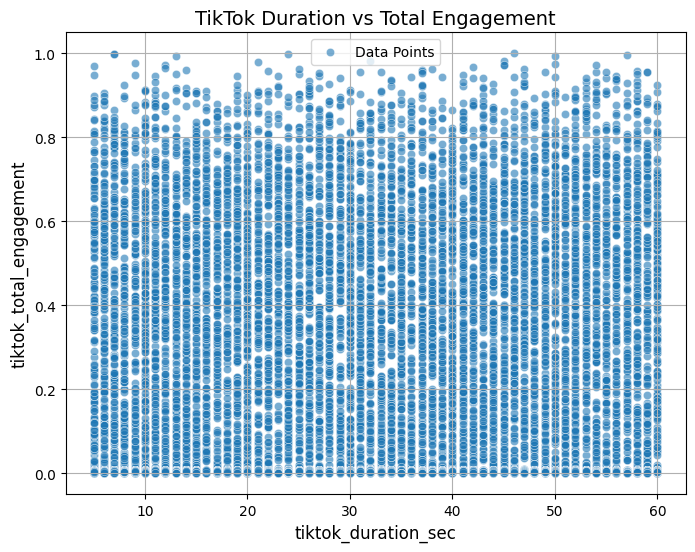

In [27]:
# Generate plots for tiktok data
scatter_with_regression(tiktok_norm_df, 'tiktok_duration_sec', 'tiktok_total_engagement', 'TikTok Duration vs Total Engagement')


Scatterplot shows no correclation

### Histogram
Trying histogram with overlaid counts

In [28]:

# Define function for histogram with overlaid counts
def histogram_with_overlay(data, duration_col, metric_col, bin_size, aggregation_func, title):
    # Create bins for duration
    data['duration_bin'] = pd.cut(data[duration_col], bins=np.arange(0, data[duration_col].max() + bin_size, bin_size))
    
    # Aggregate metric by duration bins
    aggregated_data = data.groupby('duration_bin')[metric_col].agg(aggregation_func).reset_index()
    aggregated_data['bin_center'] = aggregated_data['duration_bin'].apply(lambda x: x.mid)
    
    # Plot histogram on secondary y-axis
    fig, ax1 = plt.subplots(figsize=(10, 6))
    sns.histplot(data=data, x=duration_col, bins=np.arange(0, data[duration_col].max() + bin_size, bin_size), color="skyblue", kde=False, ax=ax1, label='Duration Histogram')
    ax1.set_xlabel(duration_col, fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)
    ax1.tick_params(axis='y')

    # Overlay aggregated metric (mean/median) on primary y-axis
    ax2 = ax1.twinx()
    ax2.plot(aggregated_data['bin_center'], aggregated_data[metric_col], marker='o', color='red', label=f'{aggregation_func.__name__.capitalize()} {metric_col}')
    ax2.set_ylabel('Metric Value', fontsize=12)
    ax2.tick_params(axis='y')

    plt.title(title, fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()

/tmp/ipykernel_57943/3215287321.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = data.groupby('duration_bin')[metric_col].agg(aggregation_func).reset_index()
/tmp/ipykernel_57943/3215287321.py:7: FutureWarning: The provided callable <function mean at 0x7f6c10078b80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggregated_data = data.groupby('duration_bin')[metric_col].agg(aggregation_func).reset_index()


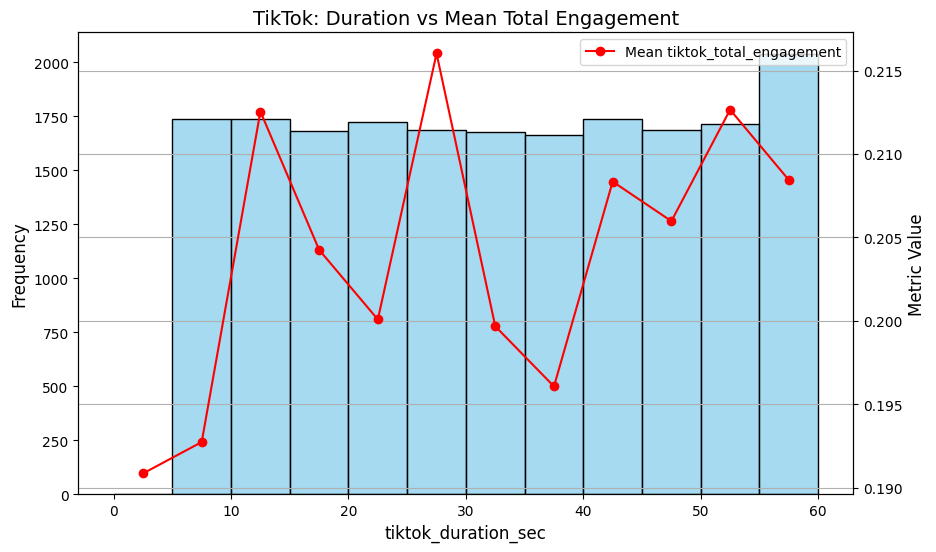

/tmp/ipykernel_57943/3215287321.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = data.groupby('duration_bin')[metric_col].agg(aggregation_func).reset_index()
/tmp/ipykernel_57943/3215287321.py:7: FutureWarning: The provided callable <function median at 0x7f6c0bf195e0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  aggregated_data = data.groupby('duration_bin')[metric_col].agg(aggregation_func).reset_index()


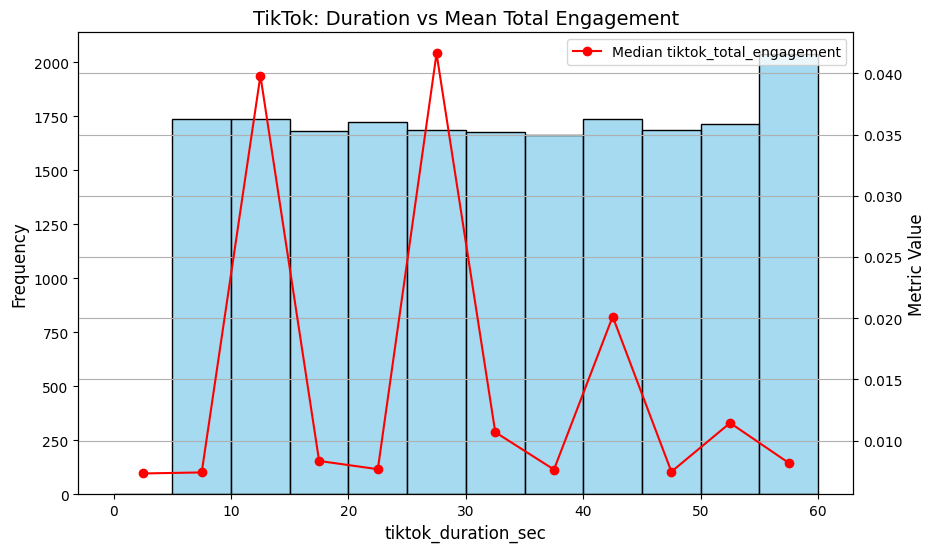

In [29]:
histogram_with_overlay(tiktok_norm_df, 'tiktok_duration_sec', 'tiktok_total_engagement', bin_size=5, aggregation_func=np.mean, title='TikTok: Duration vs Mean Total Engagement')
histogram_with_overlay(tiktok_norm_df, 'tiktok_duration_sec', 'tiktok_total_engagement', bin_size=5, aggregation_func=np.median, title='TikTok: Duration vs Mean Total Engagement')


/tmp/ipykernel_57943/3215287321.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = data.groupby('duration_bin')[metric_col].agg(aggregation_func).reset_index()
/tmp/ipykernel_57943/3215287321.py:7: FutureWarning: The provided callable <function mean at 0x7f6c10078b80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggregated_data = data.groupby('duration_bin')[metric_col].agg(aggregation_func).reset_index()


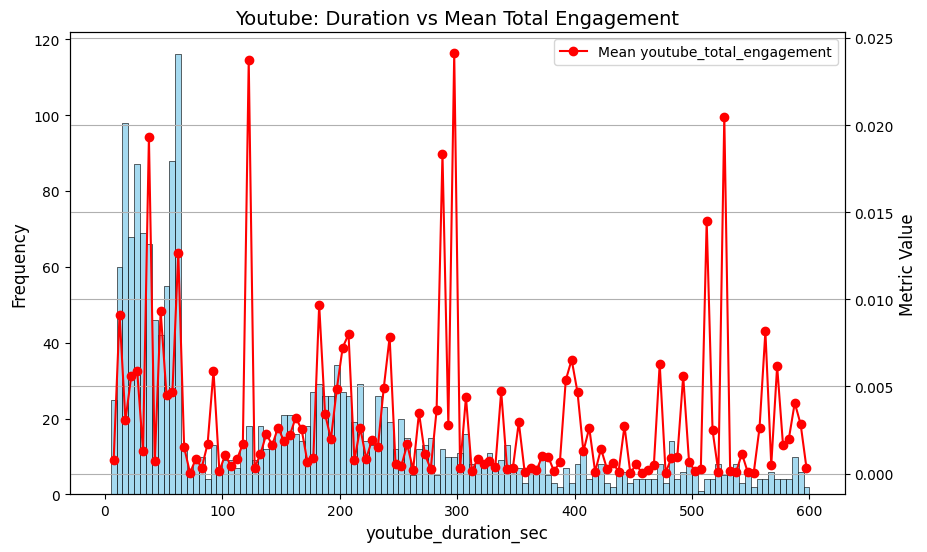

/tmp/ipykernel_57943/3215287321.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = data.groupby('duration_bin')[metric_col].agg(aggregation_func).reset_index()
/tmp/ipykernel_57943/3215287321.py:7: FutureWarning: The provided callable <function median at 0x7f6c0bf195e0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  aggregated_data = data.groupby('duration_bin')[metric_col].agg(aggregation_func).reset_index()


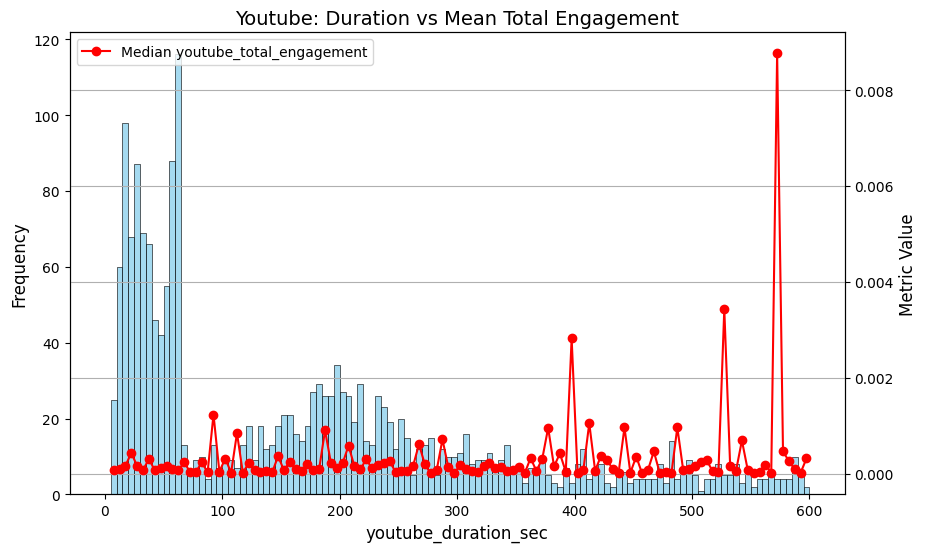

In [30]:
histogram_with_overlay(youtube_norm_df, 'youtube_duration_sec', 'youtube_total_engagement', bin_size=5, aggregation_func=np.mean, title='Youtube: Duration vs Mean Total Engagement')
histogram_with_overlay(youtube_norm_df, 'youtube_duration_sec', 'youtube_total_engagement', bin_size=5, aggregation_func=np.median, title='Youtube: Duration vs Mean Total Engagement')
